# Methods and Models

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from scripts.implementations import *

In [3]:
DATA_TRAIN_PATH = './data/train.csv' # TODO: download train data and supply path here 
y, tX2, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)

**Clean the data**

In [4]:
tx = clean_data(tX2)

**Least Squares**

In [5]:
w, loss = least_squares(y, tx)
loss

0.3446770721723313

**Gradient Descent**

Cross validation to find best gamma for our model

In [6]:
max_iters = 50
degree = 1
losses_GD = cross_validation_GD(y, tx, max_iters, degree)


Currently at gamma: 0.0001
Currently at gamma: 0.00012742749857031334
Currently at gamma: 0.0001623776739188721
Currently at gamma: 0.00020691380811147902
Currently at gamma: 0.00026366508987303583
Currently at gamma: 0.0003359818286283781
Currently at gamma: 0.00042813323987193956
Currently at gamma: 0.000545559478116852
Currently at gamma: 0.0006951927961775605
Currently at gamma: 0.0008858667904100823
Currently at gamma: 0.0011288378916846883
Currently at gamma: 0.0014384498882876629
Currently at gamma: 0.0018329807108324356
Currently at gamma: 0.002335721469090121
Currently at gamma: 0.002976351441631319
Currently at gamma: 0.00379269019073225
Currently at gamma: 0.004832930238571752
Currently at gamma: 0.00615848211066026
Currently at gamma: 0.007847599703514606
Currently at gamma: 0.01


Plot results of how losses connect to gammas

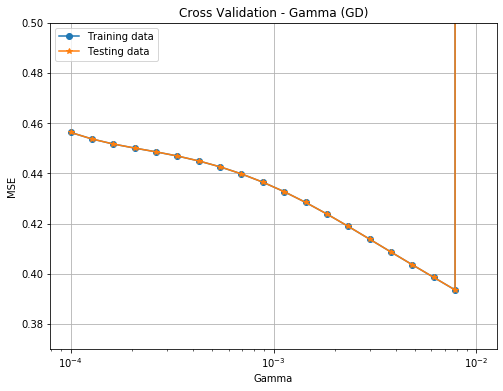

,gammas,losses_tr,losses_te
0,0.000100,4.563313e-01,4.563330e-01
1,0.000127,4.537083e-01,4.537103e-01
2,0.000162,4.516976e-01,4.516999e-01
3,0.000207,4.500823e-01,4.500849e-01
4,0.000264,4.485741e-01,4.485770e-01
5,0.000336,4.469208e-01,4.469241e-01
6,0.000428,4.449594e-01,4.449630e-01
7,0.000546,4.425995e-01,4.426036e-01
8,0.000695,4.397872e-01,4.397918e-01
9,0.000886,4.364896e-01,4.364949e-01


In [7]:
plot_cross_validation_gamma(losses_GD)
losses_GD

In [8]:
# Gradient Decent with best gamma
w_GD, loss_GD = run_GD(y, tx, max_iters = 1000, gamma=0.008)
loss_GD

0.3555756919492491

**Stochastic gradient descent**

Cross validation to find best gamma for our model

In [9]:
max_iters = 50
degree = 1
losses_SGD = cross_validation_SGD(y, tx, max_iters, degree)

Currently at gamma: 1e-05
Currently at gamma: 1.438449888287663e-05
Currently at gamma: 2.06913808111479e-05
Currently at gamma: 2.9763514416313192e-05
Currently at gamma: 4.281332398719396e-05
Currently at gamma: 6.158482110660267e-05
Currently at gamma: 8.858667904100833e-05
Currently at gamma: 0.00012742749857031334
Currently at gamma: 0.00018329807108324357
Currently at gamma: 0.00026366508987303583
Currently at gamma: 0.000379269019073225
Currently at gamma: 0.0005455594781168515
Currently at gamma: 0.0007847599703514606
Currently at gamma: 0.0011288378916846883
Currently at gamma: 0.001623776739188721
Currently at gamma: 0.002335721469090121
Currently at gamma: 0.003359818286283781
Currently at gamma: 0.004832930238571752
Currently at gamma: 0.0069519279617756054
Currently at gamma: 0.01


Plot results of how losses connect to gammas

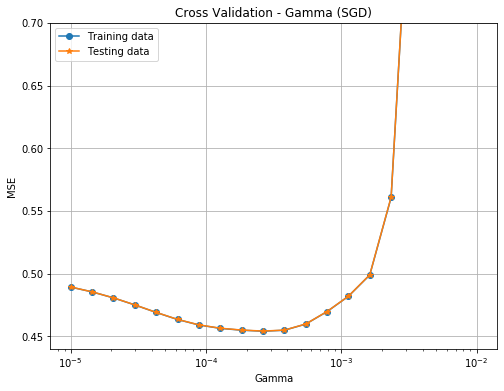

,gammas,losses_tr,losses_te
0,0.000010,4.893727e-01,4.893904e-01
1,0.000014,4.855330e-01,4.855577e-01
2,0.000021,4.807426e-01,4.807769e-01
3,0.000030,4.751323e-01,4.751790e-01
4,0.000043,4.691366e-01,4.691988e-01
5,0.000062,4.635214e-01,4.636014e-01
6,0.000089,4.591531e-01,4.592514e-01
7,0.000127,4.564512e-01,4.565644e-01
8,0.000183,4.549884e-01,4.551081e-01
9,0.000264,4.541823e-01,4.542962e-01


In [10]:
plot_cross_validation_gamma(losses_SGD, model='sgd')
losses_SGD

In [11]:
# Stochastic Gradient Decent with best gamma
w_SGD, loss_SGD = run_SGD(y, tx, max_iters = 3002, gamma=0.0003)
loss_SGD

0.15374219258536537

**Least Squares**

Cross Validation to find best degree of model

In [12]:
max_degree = 11
losses_LS = cross_validation_least_squares(y, tx, max_degree)

Currently at degree: 0
Currently at degree: 1
Currently at degree: 2
Currently at degree: 3
Currently at degree: 4
Currently at degree: 5
Currently at degree: 6
Currently at degree: 7
Currently at degree: 8
Currently at degree: 9
Currently at degree: 10
Currently at degree: 11


Plot results of how losses connect to degrees

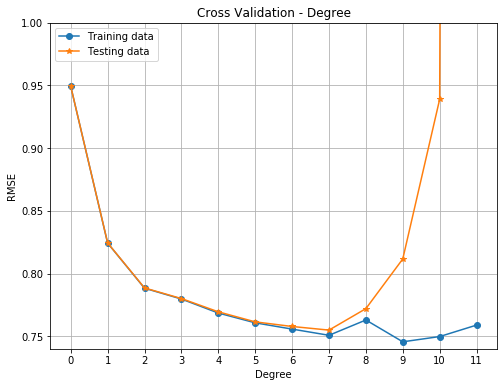

,degree,losses_tr,losses_te
0,0,0.949203,0.949204
1,1,0.824274,0.824401
2,2,0.788299,0.788507
3,3,0.779679,0.780042
4,4,0.768510,0.769481
5,5,0.760702,0.761474
6,6,0.755709,0.757791
7,7,0.750763,0.754896
8,8,0.762958,0.772013
9,9,0.745571,0.811618


In [13]:
plot_cross_validation_degree(losses_LS)
losses_LS

In [14]:
# Least Squares with best degree
tx_7 = build_poly(tx, 7)
w_LS, loss_LS = least_squares(y, tx_7)
loss_LS

0.28043264482571134

**Ridge Regression**

Cross Validation to find best lambda of model

In [15]:
degree = 10
losses_lambda = cross_validation_ridge(y, tx, degree)

0.001
0.0027825594022071257
0.007742636826811269
0.021544346900318832
0.05994842503189409
0.1668100537200059
0.46415888336127775
1.2915496650148828
3.593813663804626
10.0


Plot results of how losses connect to lambdas

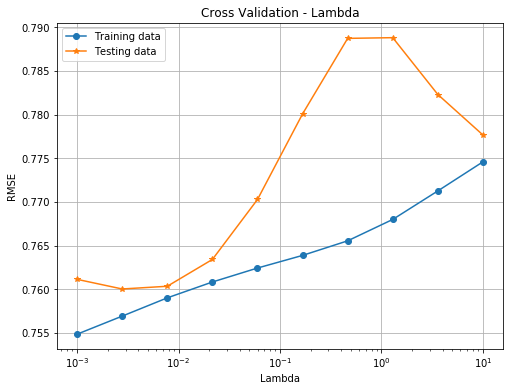

In [16]:
plot_cross_validation_lambda(losses_lambda)

In [17]:
losses_lambda

,lambdas,losses_tr,losses_te
0,0.001000,0.754860,0.761134
1,0.002783,0.756926,0.760032
2,0.007743,0.759016,0.760344
3,0.021544,0.760831,0.763412
4,0.059948,0.762429,0.770275
5,0.166810,0.763876,0.780072
6,0.464159,0.765543,0.788716
7,1.291550,0.767993,0.788797
8,3.593814,0.771257,0.782292
9,10.000000,0.774585,0.777658


In [18]:
# Ridge regression using the best lambda & degree
txx = build_poly(tx, 10)
w_RR, loss_RR = ridge_regression(y, tx, 0.0027)
loss_RR

0.3464379182448381